This IPython-Notebook serves as an illustration for the conference paper

*"Criterion for the existence of a separated coordinate representation for underactuated mechanical systems"* 

submitted to "IEEE 2019 International Conference on Mechatronics"

---

The source code depends on the following modules:

* [`symbtools`](https://github.com/TUD-RST/symbtools) 
  (Basic functionality for symbolic calculations w.r.t control theory)
    
* [`pycartan`](https://github.com/TUD-RST/pycartan)
  (Fucntionality for calculations with differential forms)

* [`ipydex`](https://github.com/cknoll/ipydex)
 (Contains the `displaytools`-jupyter-notebook-extension. This enables "magic" comments (e.g. `##:`) which achieve the diplay of the result of an assignment.)


[//]: # (custom_config_start)
$$
\newcommand{\col}{\mathrm{col}}
\newcommand{\opspan}{\operatorname{span}}
\newcommand{\bs}{\boldsymbol}
\newcommand{\mb}{\mathbf}
\newcommand{\nx}{n_{\boldsymbol x}}
\newcommand{\Ddt}{\left(\tfrac{d}{dt}\right)}
$$


$$
\newcommand{\r}{\mathbf{r}}
\newcommand{\F}{\mathbf{F}}
\newcommand{\h}{\mathbf{h}}
\newcommand{\eps}{\varepsilon}
%
\newcommand{\B}{\mathbf{B}}
\newcommand{\M}{\mathbf{M}}
\newcommand{\C}{\mathbf{C}}
\newcommand{\K}{\mathbf{K}}
\newcommand{\btheta}{\boldsymbol{\theta}}
\newcommand{\btau}{\boldsymbol{\tau}}
$$

[//]: # (custom_config_end)

**Considered System**: Underactuated four-joint-manipulator with passive joints and forces at the endeffetor regarded as the systems's input .<br>

<img src="files/images/manipulator4j.png">

**Considered tasks**:
* Generation of equations of motion
* Check of the criterion for the existence of a separated coordinate representation

In [1]:
%load_ext ipydex.displaytools

import sympy as sp
from sympy import sin, cos, pi
from sympy.interactive import printing
import symbtools as st
import symbtools.modeltools as mt
from symbtools.modeltools import Rz # rotation matrix


printing.init_printing(1)

In [2]:
t = sp.Symbol('t')
np = 4
nq = 0
n = np + nq
pp = st.symb_vector("p1:{0}".format(np+1))
qq = st.symb_vector("q1:{0}".format(nq+1))


aa = st.symb_vector("a1:{0}".format(nq+1))

ttheta = st.row_stack(pp, qq) ##:T
tthetad = st.time_deriv(ttheta, ttheta) ##:T
tthetadd = st.time_deriv(ttheta, ttheta, order=2) ##:T
st.make_global(ttheta, tthetad)

---


---


---


In [3]:
params = sp.symbols('s1, s2, s3, s4, m1, m2, m3, m4, J1, J2, J3, J4, l1, l2, l3, l4, kappa')
st.make_global(params)


# 
# QQ = st.symb_vector("Q1, Q2, Q3, Q4")

# forces at the end effector
tau1, tau2 = ttau = st.symb_vector("tau1, tau2")

###  Geometry of the mechanical System

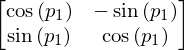

In [4]:
Rz(p1) # Rotationsmatirx

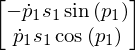

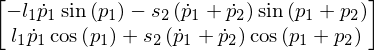

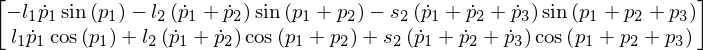

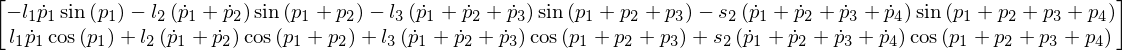

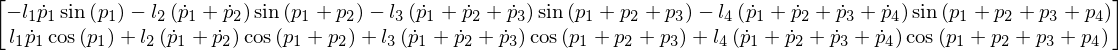

---


In [5]:
# unit vectors

ex = sp.Matrix([1, 0])
ey = sp.Matrix([0, 1])

# coordinates of the centers of masses (S)and joints (G)
S1 = Rz(p1)*ex*s1
G1 = Rz(p1)*ex*l1
S2 = G1 + Rz(p1 + p2)*ex*s2
G2 = G1 + Rz(p1 + p2)*ex*l2
S3 = G2 + Rz(p1 + p2 + p3)*ex*s2
G3 = G2 + Rz(p1 + p2 + p3)*ex*l3
S4 = G3 + Rz(p1 + p2 + p3 + p4)*ex*s2
EE = G3 + Rz(p1 + p2 + p3 + p4)*ex*l4



# time derivative of the velocities of the center of masses
Sd1, Sd2, Sd3, Sd4, EEd = st.col_split(st.time_deriv(st.col_stack(S1, S2, S3, S4, EE), ttheta)) ##

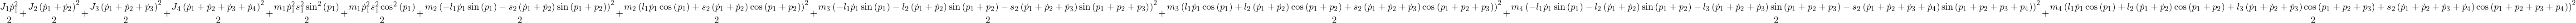

---


In [6]:
# kinetic energy
T_rot = (J1*pdot1**2)/2 + (J2*(pdot1 + pdot2)**2)/2 + (J3*(pdot1 + pdot2 + pdot3)**2)/2 + (J4*(pdot1 + pdot2 + pdot3 + pdot4)**2)/2
T_trans = ( m1*Sd1.T*Sd1  +  m2*Sd2.T*Sd2 +  m3*Sd3.T*Sd3 +  m4*Sd4.T*Sd4 )/2

T = T_rot + T_trans[0] ##:

# potential energy
V = 0

In [7]:
if 0:
    # Kinetische Energie mit Platzhaltersymbolen einführen:

    M1, M2, M3 = MM = st.symb_vector('M1:4')
    MM_subs = [(J1 + m1*s1**2 + m2*l1**2, M1), (J2 + m2*s2**2, M2), (m2*l1*s2, M3)]
    MM_rplm = st.rev_tuple(MM_subs) # Umkehrung der inneren Tupel -> [(M1, J1+... ), ...]

    T_plh = M1*qdot1**2/2 + M2*pdot1**2/2 + M2*pdot1*qdot1 + M2*qdot1**2/2 + M3*pdot1*qdot1*cos(p1) + M3*qdot1**2*cos(p1)

    # Probe:
    assert sp.simplify(T_plh.subs(MM_rplm) - T) == 0

In [8]:
# absolute coordinates
a1 = p1
a2 = a1 + p2
a3 = a2 + p3
a4 = a3 + p4

Definition of virtual Work: $\delta W = \sum_{j=1}^N \F_j \delta \r_j$, where $\F_j$ are external forces and $ \delta \r_j$ are virtual displacements of point-mass $j=1, \ldots, N$. See also https://en.wikipedia.org/wiki/Generalized_forces.

We have in general
$$
\delta \mathbf{r}_j = \sum_{i=1}^n \frac {\partial \mathbf {r}_j} {\partial \theta_i} \delta \theta_i,\quad j=1,\ldots, N 
$$


$$
\delta W = \underbrace{\sum_{j=1}^N \mathbf {F}_{j} \cdot \frac {\partial \mathbf {r}_j} {\partial \theta_1}}_{Q_1} \delta \theta_1 +
\ldots +
\underbrace{\sum_{j=1}^N \mathbf {F}_{j} \cdot \frac {\partial \mathbf {r}_j} {\partial \theta_m}}_{Q_m} \delta \theta_m = Q_1\delta \theta_1 + \ldots + Q_m\delta \theta_m.
$$
with
$
   Q_i = \sum_{j=1}^N \mathbf {F}_{j} \cdot \frac {\partial \mathbf {r}_j} {\partial \theta_i},\quad i=1,\ldots, m, 
$

---

In the present situation we have $N=1$ (external force acts only at end effector) and $\theta_i = p_i$ for $i=1, \ldots, n$ with $n=4$. Thus we have:

$$
 Q_i =  \mathbf {F}_{EE} \cdot \frac {\partial \mathbf {r_{EE}}} {\partial p_i},\quad i=1,\ldots, 4
$$



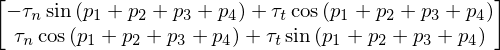

---


In [9]:
# virtual work

ttau = st.symb_vector('tau_t, tau_n')

# x-y-coordinates of the Vector of external forces
tau_vect = Rz(a4)*ttau  ##:


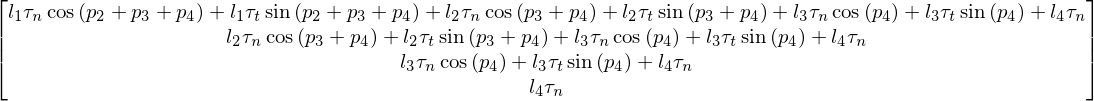

---


In [10]:
QQ = (EE.jacobian(pp).T*tau_vect).smplf ##:

Calculate the right hand side of

$$
\M(\btheta) + \C(\btheta, \dot \btheta) + \K(\btheta, \dot \btheta) = \B(\btheta) \btau.
$$

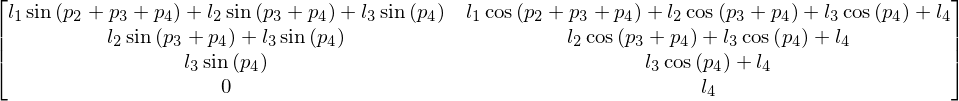

---


In [11]:
B = QQ.jacobian(ttau) ##:



### Check integrability with differential form approach

In [12]:
import pycartan as pc

w1, w2 = ww = pc.VectorDifferentialForm(1, ttheta, coeff=B.T)

In [13]:
res1 = w1.d^w1^w2
res2 = w2.d^w1^w2

In [14]:
res2 = w2.d^w1^w2

In [15]:
res1.coeff.smplf ##:
res2.coeff.smplf ##:

___


___


#### Conclusion:

Both 4-Forms vanish, thus the integrability is given. A separated cooedinate representation exists.


---


### Vector-Field approach (Example 2)

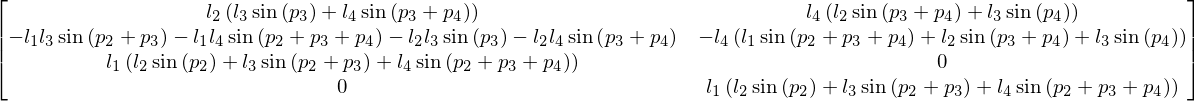

---


___


In [16]:
nsm = st.nullspaceMatrix(B.T) ##:

nsm.shape ##:


v1, v2 = st.col_split(nsm)

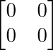

---


In [17]:
# check that null space Matrix is correct

test = (nsm.T * B).smplf ##:

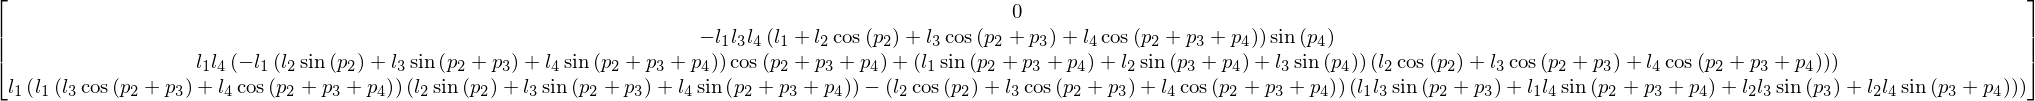

---


___


In [18]:
v3 = st.lie_bracket(v1, v2, pp).smplf ##:

Mtest = st.col_stack(v1, v2, v3)

st.generic_rank(Mtest) ##:

#### Conlcusion
Distribution is involutive (consistently with the result above).

----

Now consider only one input: either $\tau_\mathrm t$ or $\tau_\mathrm n$. This is equivalent to drop either $\omega_2$ or $\omega_1$.


In [19]:
eta_1 = w1.d^w1
eta_2 = w2.d^w2

eta_1.coeff.simplify()
eta_2.coeff.simplify()


eta_1 ##:
eta_2 ##:

eta_1  := (-l1*l2*sin(p2))dp1^dp2^dp3  +  (-l1*(l2*sin(p2) + l3*sin(p2 + p3)))dp1^dp2^dp4  +  (-l3*(l1*sin(p2 + p3) + l2*sin(p3)))dp1^dp3^dp4  +  (-l2*l3*sin(p3))dp2^dp3^dp4

___


eta_2  := (-l1*l2*sin(p2))dp1^dp2^dp3  +  (-l1*(l2*sin(p2) + l3*sin(p2 + p3)))dp1^dp2^dp4  +  (-l3*(l1*sin(p2 + p3) + l2*sin(p3)))dp1^dp3^dp4  +  (-l2*l3*sin(p3))dp2^dp3^dp4

___


In [20]:
eta_1.coeff[0] ##:

eta_2.coeff[0] ##:

___


___


### Vectorfield approach

In [21]:
# abbreviations:

sscc = st.symb_vector("s_{234}, s_{34}, s_{4}, c_{234}, c_{34}, c_{4}, s_{2}, s_{3}, s_{23}, c_{2}, c_{3}, c_{23}") ##:T

rplmsscc = list(zip([sin(p2+ p3 + p4), sin(p3 + p4), sin(p4), cos(p2+ p3 + p4), cos(p3 + p4), cos(p4),
                     sin(p2), sin(p3), sin(p2 + p3), cos(p2), cos(p3), cos(p2 + p3)], sscc))

---


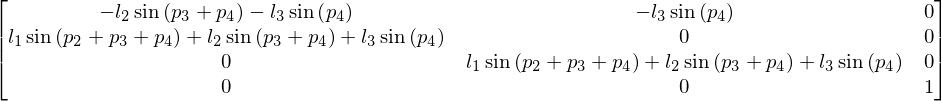

---


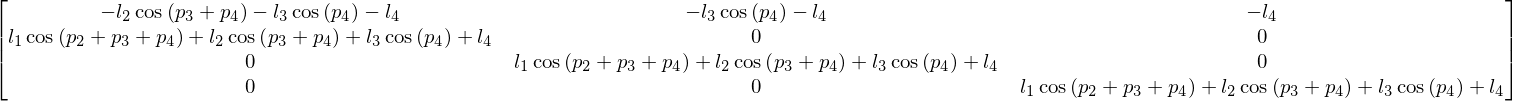

---


___


___


---


---


In [22]:
nsm1 = st.nullspaceMatrix(B[:, 0].T) ##:
nsm2 = st.nullspaceMatrix(B[:, 1].T) ##:


lb1 = st.lie_bracket(nsm1[:, 0], nsm1[:, 1], pp)
lb2 = st.lie_bracket(nsm2[:, 0], nsm2[:, 1], pp)


st.generic_rank(st.col_stack(nsm1, lb1)) ##:
st.generic_rank(st.col_stack(nsm2, lb2)) ##:


det1 = st.col_stack(nsm1, lb1).det().smplf.subs(rplmsscc) ##:
det2 = st.col_stack(nsm2, lb2).det().subs(rplmsscc) ##:

### Conclusion
For these two modified systems (either without $\tau_\mathrm t$ or without $\tau_\mathrm n$) a separated coordinate representaion does not exist.